## Introduction
The Data Wrangling and Exploratory Data Analysis phase is a crucial step in any data science project. It involves preparing and exploring the dataset to uncover the underlying patterns, trends, and relationships that are critical for the subsequent predictive modeling. In this project, we focused on the stock prices of Seritage Growth Properties (SRG), a publicly traded real estate investment trust (REIT). Our goal was to conduct an in-depth analysis of the historical stock prices and prepare the data for future time series forecasting.

In [7]:
import pandas as pd

# Load the data
data = pd.read_csv('Data/SRG.csv')

# Display the first few rows of the dataframe
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-03,7.56,7.710000,6.260,6.68,6.68,1649900
1,2020-04-06,7.11,7.750000,7.110,7.61,7.61,1230400
2,2020-04-07,8.30,9.770000,7.825,8.22,8.22,1551600
3,2020-04-08,8.50,9.950000,8.400,9.47,9.47,2151500
4,2020-04-09,9.90,16.190001,9.872,11.67,11.67,7732100


**Date:** The date of the stock data.

**Open:** The opening price of SRG stock on the given date.

**High:** The highest price the SRG stock reached on the given date.

**Low:** The lowest price the SRG stock reached on the given date.

**Close:** The closing price of the SRG stock on the given date.

**Adj Close:** The adjusted closing price of the SRG stock on the given date. This figure adjusts the closing price to account for dividends, stock splits, and new stock offerings, giving a more accurate picture of the stock's value.

**Volume:** The number of shares of SRG stock that were traded on the given date.

## Data Wrangling

In [8]:
# Check for missing values
missing_values = data.isnull().sum()

# Check data types
data_types = data.dtypes

# Descriptive statistics
descriptive_stats = data.describe()

missing_values, data_types, descriptive_stats

(Date         0
 Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume       0
 dtype: int64,
 Date          object
 Open         float64
 High         float64
 Low          float64
 Close        float64
 Adj Close    float64
 Volume         int64
 dtype: object,
              Open        High         Low       Close   Adj Close  \
 count  814.000000  814.000000  814.000000  814.000000  814.000000   
 mean    12.773624   13.130048   12.411009   12.746609   12.746609   
 std      3.622510    3.731383    3.526279    3.617589    3.617589   
 min      5.150000    5.235000    4.900000    5.210000    5.210000   
 25%      9.972500   10.292500    9.652500    9.942500    9.942500   
 50%     12.400000   12.690000   12.100000   12.425000   12.425000   
 75%     15.260000   15.695000   14.947500   15.287500   15.287500   
 max     23.280001   24.059999   22.870001   23.219999   23.219999   
 
              Volume  
 count  8.140000e+02  
 mean   7.980703e+05  
 s

The dataset does not have any missing values, which is great because it means we won't have to do any imputation or dropping of rows/columns due to missing data.

The data types for each column are as expected. The Date column is an object, and the rest of the columns are numerical (float64 for the stock prices and int64 for the volume).

Here are some descriptive statistics for the numerical columns:

The mean opening price is approximately \\$12.77, with a standard deviation of \\$3.62. The minimum opening price was \\$5.15 and the maximum was \$23.28.
The mean volume of shares traded is about 798,070. The standard deviation is quite high, at about 2,977,556. This suggests that there's a wide dispersion in the trading volume.

## Exploratory Data Analysis (EDA)

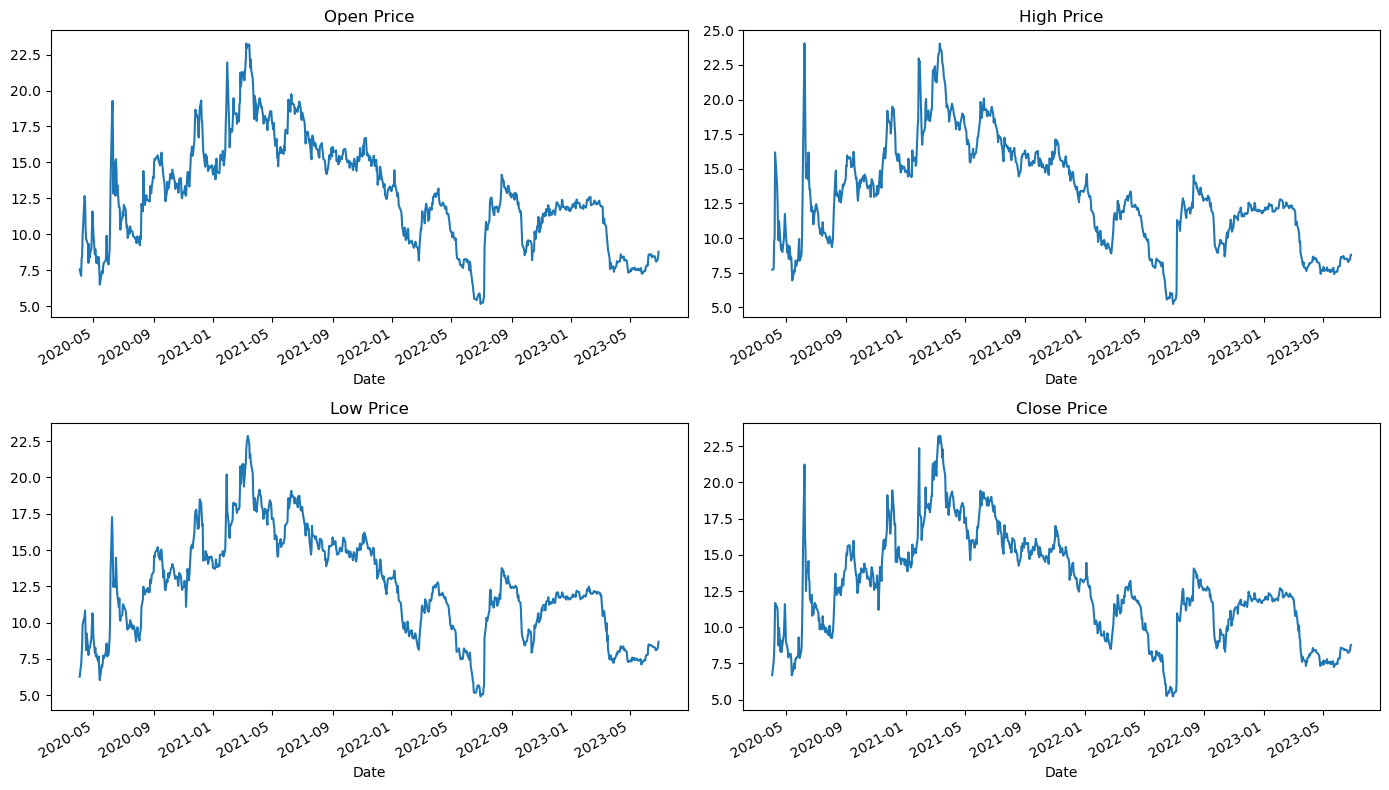

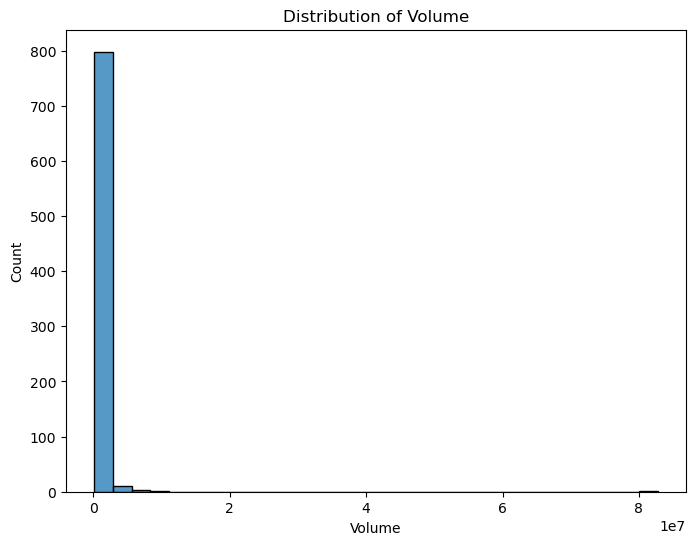

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'Date' column to datetime data type
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Plotting time series of the stock prices
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
data['Open'].plot()
plt.title('Open Price')

plt.subplot(2, 2, 2)
data['High'].plot()
plt.title('High Price')

plt.subplot(2, 2, 3)
data['Low'].plot()
plt.title('Low Price')

plt.subplot(2, 2, 4)
data['Close'].plot()
plt.title('Close Price')

plt.tight_layout()
plt.show()

# Plotting distribution of the volume of shares traded
plt.figure(figsize=(8, 6))
sns.histplot(data['Volume'], kde=False, bins=30)
plt.title('Distribution of Volume')
plt.show()

The time series plots show the trends in the opening, high, low, and closing prices of SRG stocks. We can observe some significant fluctuations over time, but it seems that there are no specific patterns or seasonality in the stock prices.

The histogram provides a view of the distribution of the trading volumes. Most of the trading volumes are concentrated on the lower end, with a few instances of high trading volumes. This is typical for trading volume data, which tends to have a right-skewed distribution due to occasional periods of very high activity.

In [10]:
# Create lagged feature
data['Lagged_Close'] = data['Close'].shift(1)

# Create moving average feature
data['MA_5_Close'] = data['Close'].rolling(window=5).mean()

# Calculate returns
data['Returns'] = data['Close'].pct_change()

# Drop the null values created by our new features
data.dropna(inplace=True)

data.head()

,Open,High,Low,Close,Adj Close,Volume,Lagged_Close,MA_5_Close,Returns
Date,,,,,,,,,
2020-04-09,9.90,16.190001,9.872,11.67,11.67,7732100,9.47,8.730,0.232313
2020-04-13,12.66,13.810000,10.421,11.38,11.38,1660500,11.67,9.670,-0.024850
2020-04-14,12.36,12.640000,10.830,11.18,11.18,1095900,11.38,10.384,-0.017575
2020-04-15,10.50,10.610000,9.600,9.80,9.80,1854000,11.18,10.700,-0.123435
2020-04-16,9.70,9.833000,8.100,8.73,8.73,1811200,9.80,10.552,-0.109184


The newly created features have been added to the dataset:

**Lagged_Close**: This represents the closing price of the stock on the previous day.

**MA_5_Close**: This is the moving average of the closing price over the last 5 days.

**Returns**: This is the percentage change in the closing price from the previous day.

Next, let's check for stationarity using the Augmented Dickey-Fuller test. The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is no unit root. If the p-value is above a critical size (e.g., 0.05), then we cannot reject the hypothesis that there is a unit root.

Let's apply this test to the 'Close' prices and the 'Returns'.

In [13]:
from statsmodels.tsa.stattools import adfuller

# Function to perform Augmented Dickey-Fuller test
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF test statistic', 'p-value', '# lags used', '# observations']
    out = pd.Series(result[0:4], index=labels)
    for key, val in result[4].items():
        out[f'critical value ({key})'] = val
    print(out.to_string())
    print('\n')

# Perform the test on the 'Close' prices and the 'Returns'
adf_test(data['Close'], title='Close Price')
adf_test(data['Returns'], title='Returns')

Augmented Dickey-Fuller Test: Close Price
ADF test statistic       -2.240217
p-value                   0.191974
# lags used               3.000000
# observations          806.000000
critical value (1%)      -3.438489
critical value (5%)      -2.865133
critical value (10%)     -2.568683


Augmented Dickey-Fuller Test: Returns
ADF test statistic     -1.703247e+01
p-value                 8.306231e-30
# lags used             2.000000e+00
# observations          8.070000e+02
critical value (1%)    -3.438479e+00
critical value (5%)    -2.865128e+00
critical value (10%)   -2.568681e+00




The **Augmented Dickey-Fuller (ADF)** test results are as follows:

For the 'Close' prices, the p-value is approximately 0.19, which is greater than 0.05. We therefore cannot reject the null hypothesis that there is a unit root, and we conclude that the 'Close' prices are not stationary.
For the 'Returns', the p-value is very small (approximately 8.3×10<sup>−30</sup>), which is much less than 0.05. 

This allows us to reject the null hypothesis and conclude that the 'Returns' are stationary.
These results have implications for the type of time series model we may want to use. Non-stationary data is often more suited to models such as ARIMA that can handle trends, while stationary data is suitable for a wide range of time series models.

Let's also do a correlation analysis to see the relationship between the different features. We'll generate a correlation matrix and visualize it as a heatmap for easier interpretation.

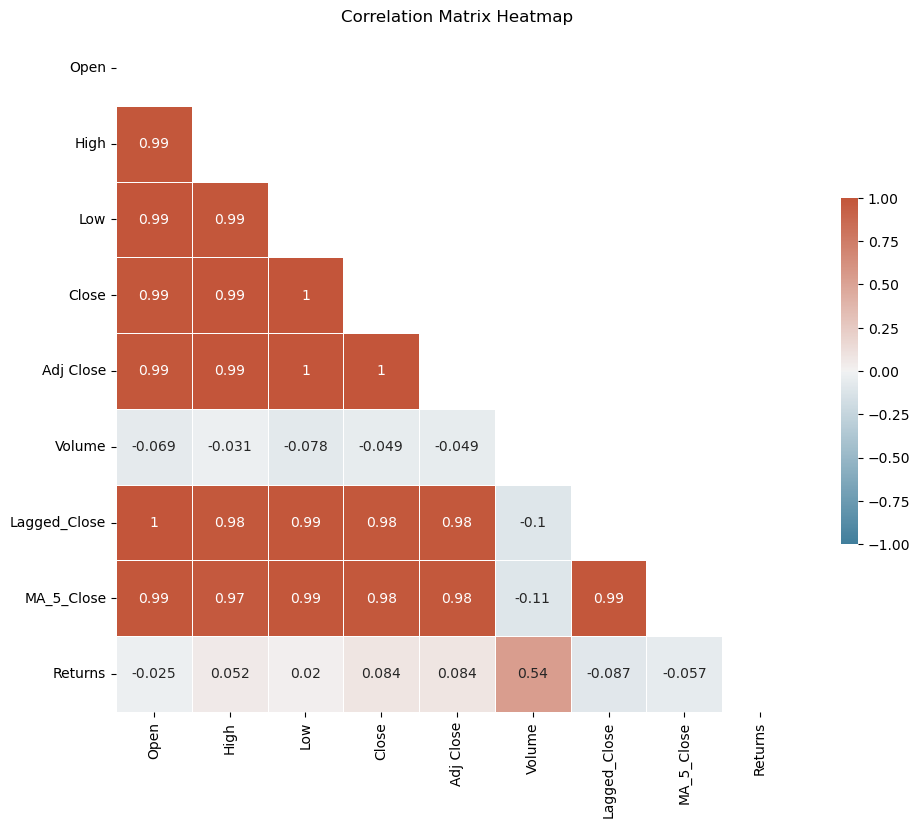

In [15]:
import numpy as np

# Compute the correlation matrix
corr_matrix = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

Key observations from the heatmap:

- The stock prices (Open, High, Low, Close, Adj Close) are highly positively correlated with each other, which is to be expected.
- The lagged closing price (Lagged_Close) is also highly correlated with the stock prices.
- The moving average of the closing price (MA_5_Close) is highly correlated with the stock prices and the lagged closing price.
- The volume of shares traded (Volume) has a low positive correlation with the stock prices. This suggests that on days when the stock price is higher, the volume of shares traded might be slightly higher too, but the relationship is not very strong.
- The returns (Returns) show very little correlation with the other variables.

In [21]:
file_path = 'Data/updated_SRG.csv'
data.to_csv(file_path, index=True)

## Conclusion

Through our data wrangling and exploratory data analysis, we gained a thorough understanding of the SRG stock price dataset. We began by checking for missing values and data types, and then performed descriptive statistics to understand the distribution of our data. We converted the 'Date' column to a datetime type to facilitate time series analysis.

We then visualized the time series of the stock prices and the distribution of trading volumes, which revealed significant fluctuations in the stock prices and a right-skewed distribution of trading volumes.

In a more detailed analysis, we created new features such as lagged prices, moving averages, and returns to capture temporal dependencies and trends in the data. We tested for stationarity in our data using the Augmented Dickey-Fuller test and found that while the closing prices were not stationary, the returns were.

Finally, we conducted a correlation analysis to understand the relationships between different features. We found that the stock prices were highly correlated with each other and with the lagged prices and moving averages, while they had a lower correlation with the trading volumes and returns.

This detailed analysis provided valuable insights into the SRG stock prices and prepared our data for the next phase of the project: building a predictive model for stock price forecasting.